<a href="https://colab.research.google.com/github/lindonjonhson/irish-songs-generator/blob/main/william_bot_yeats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2024-04-11 10:04:38--  https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.183.207, 173.194.193.207, 173.194.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.183.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2024-04-11 10:04:39 (77.6 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [4]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

#Fitting the tokenizer with the sentences
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1   #2690

When generating text, we do not need a test set

In [5]:
# Creating sequences
input_sequences =[]

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]  # Transform the lines in arrays with the codes from the word index
  #print(token_list)
  #print(line)
  #print(len(token_list))
  for i in range(1, len(token_list)): # Now we will work with ngrams, which are the "parts" of a line until it is completemax
    #print(token_list[:i+1])
    n_gram_sequence = token_list[:i+1]
    #print(n_gram_sequence)
    input_sequences.append(n_gram_sequence)

In [6]:
# Retrieving the length of the longest of the sentences
max_sequence_len = max(len(x) for x in input_sequences)

#Padding
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [7]:
# Generating Xs and Ys/labels by splitting the arrays

xs = input_sequences[:, :-1]
labels = input_sequences[:, -1]

In [8]:
# Now we will make the labels categorical and hot-encoded
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [9]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
377/377 [==============================] - 39s 92ms/step - loss: 6.7739 - accuracy: 0.0640
Epoch 2/100
377/377 [==============================] - 33s 88ms/step - loss: 6.2589 - accuracy: 0.0746
Epoch 3/100
377/377 [==============================] - 35s 93ms/step - loss: 6.0109 - accuracy: 0.0835
Epoch 4/100
377/377 [==============================] - 35s 93ms/step - loss: 5.7115 - accuracy: 0.0990
Epoch 5/100
377/377 [==============================] - 33s 88ms/step - loss: 5.3666 - accuracy: 0.1185
Epoch 6/100
377/377 [==============================] - 35s 92ms/step - loss: 5.0121 - accuracy: 0.1347
Epoch 7/100
377/377 [==============================] - 34s 90ms/step - loss: 4.6670 - accuracy: 0.1504
Epoch 8/100
377/377 [==============================] - 34s 89ms/step - loss: 4.3298 - accuracy: 0.1789
Epoch 9/100
377/377 [==============================] - 34s 90ms/step - loss: 4.0065 - accuracy: 0.2142
Epoch 10/100
377/377 [==============================] - 32s 84ms/step - l

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

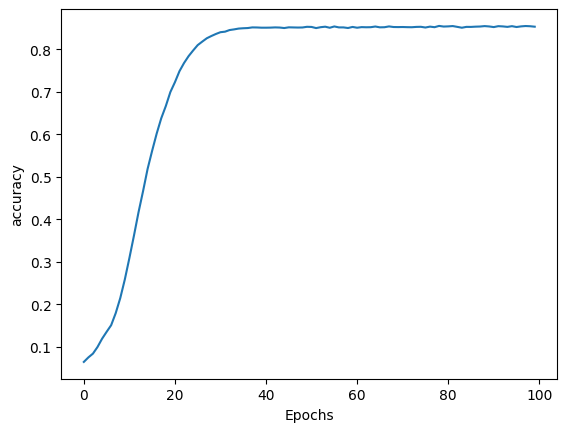

In [11]:
plot_graphs(history, 'accuracy')


In [12]:
seed_text = "In the darkest night"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 32ms/step
In the darkest night i will my love when he can keep say up it is someone i love her more has gone gone and paddy star me strength heard gone by wind lower wish middle magic i you could meet with mine she makes shed wonder young pride says ye but visit rocky bid threw streets of grow fairest slip starved write of all the sea shines swore youll be cry to stay out he grow but wind away out in its valley rove in the sea grow by your breast mary of the sea is this youll sat back more she she
